In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
a=pd.read_csv(r'\Users\user\Desktop\mpg.csv')

In [3]:
a

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,usa,ford ranger


In [4]:
a.shape

(398, 9)

In [5]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  394 non-null    float64
 3   horsepower    389 non-null    float64
 4   weight        393 non-null    float64
 5   acceleration  396 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(5), int64(2), object(2)
memory usage: 28.1+ KB


In [6]:
a.isnull().sum()

mpg             0
cylinders       0
displacement    4
horsepower      9
weight          5
acceleration    2
model_year      0
origin          0
name            0
dtype: int64

In [7]:
a.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [8]:
a.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [9]:
for i in ['displacement', 'horsepower', 'weight',
       'acceleration']:
    a[i]=a[i].fillna(a[i].median())

In [10]:
a.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [11]:
a.groupby('mpg')['acceleration'].mean()

mpg
9.0     18.500000
10.0    14.500000
11.0    12.375000
12.0    12.083333
13.0    12.935000
          ...    
43.4    23.700000
44.0    24.600000
44.3    21.700000
44.6    13.800000
46.6    17.900000
Name: acceleration, Length: 129, dtype: float64

In [12]:
a.cylinders.nunique()

5

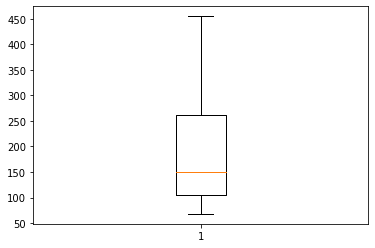

In [13]:
plt.boxplot(a['displacement'])
plt.show()

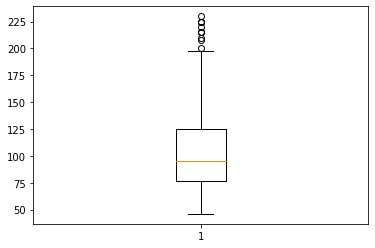

In [14]:
plt.boxplot(a['horsepower'])
plt.show()

In [15]:
q1=np.percentile(a['horsepower'],25,interpolation='midpoint')
q2=np.percentile(a['horsepower'],50,interpolation='midpoint')
q3=np.percentile(a['horsepower'],75,interpolation='midpoint')
print(q1,q2,q3)

76.5 95.0 125.0


In [16]:
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
print(iqr,lower,upper)

48.5 3.75 197.75


In [17]:
outlier=[]
for i in a['horsepower']:
    if((i>upper) or (i<lower)):
        outlier.append(i)

In [18]:
outlier

[198.0,
 220.0,
 215.0,
 225.0,
 225.0,
 215.0,
 200.0,
 210.0,
 208.0,
 198.0,
 215.0,
 225.0,
 230.0]

In [19]:
ind=a['horsepower']>upper
a.loc[ind].index

Int64Index([5, 6, 7, 8, 13, 25, 26, 27, 67, 90, 94, 95, 116], dtype='int64')

In [20]:
a.drop([5, 6, 7, 8, 13, 25, 26, 27, 67, 90, 94, 95, 116],inplace=True)

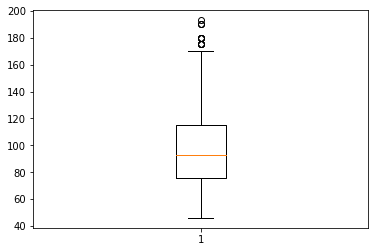

In [21]:
plt.boxplot(a['horsepower'])
plt.show()